In [59]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score


In [42]:
df = pd.read_csv('evraz_data.csv', sep=';', decimal=",")
x1_col = 'сыпуч известь РП'
x2_cols = ['химшлак последний Al2O3', 'химшлак последний CaO',
          'химшлак последний FeO', 'химшлак последний MgO',
          'химшлак последний MnO', 'химшлак последний R',
          'химшлак последний SiO2']

df = df[[x1_col] + x2_cols]
print(df.shape)
df = df.dropna()
print(df.shape)

(7041, 8)
(3763, 8)


In [23]:
# Удаленние выбросов
isfor = IsolationForest()
isfor.fit(df)
isfor_pred = isfor.predict(df)

df = df[isfor_pred==1]
print(df.shape)

(3304, 8)


(0.0, 1.0, 0.0, 1.0)

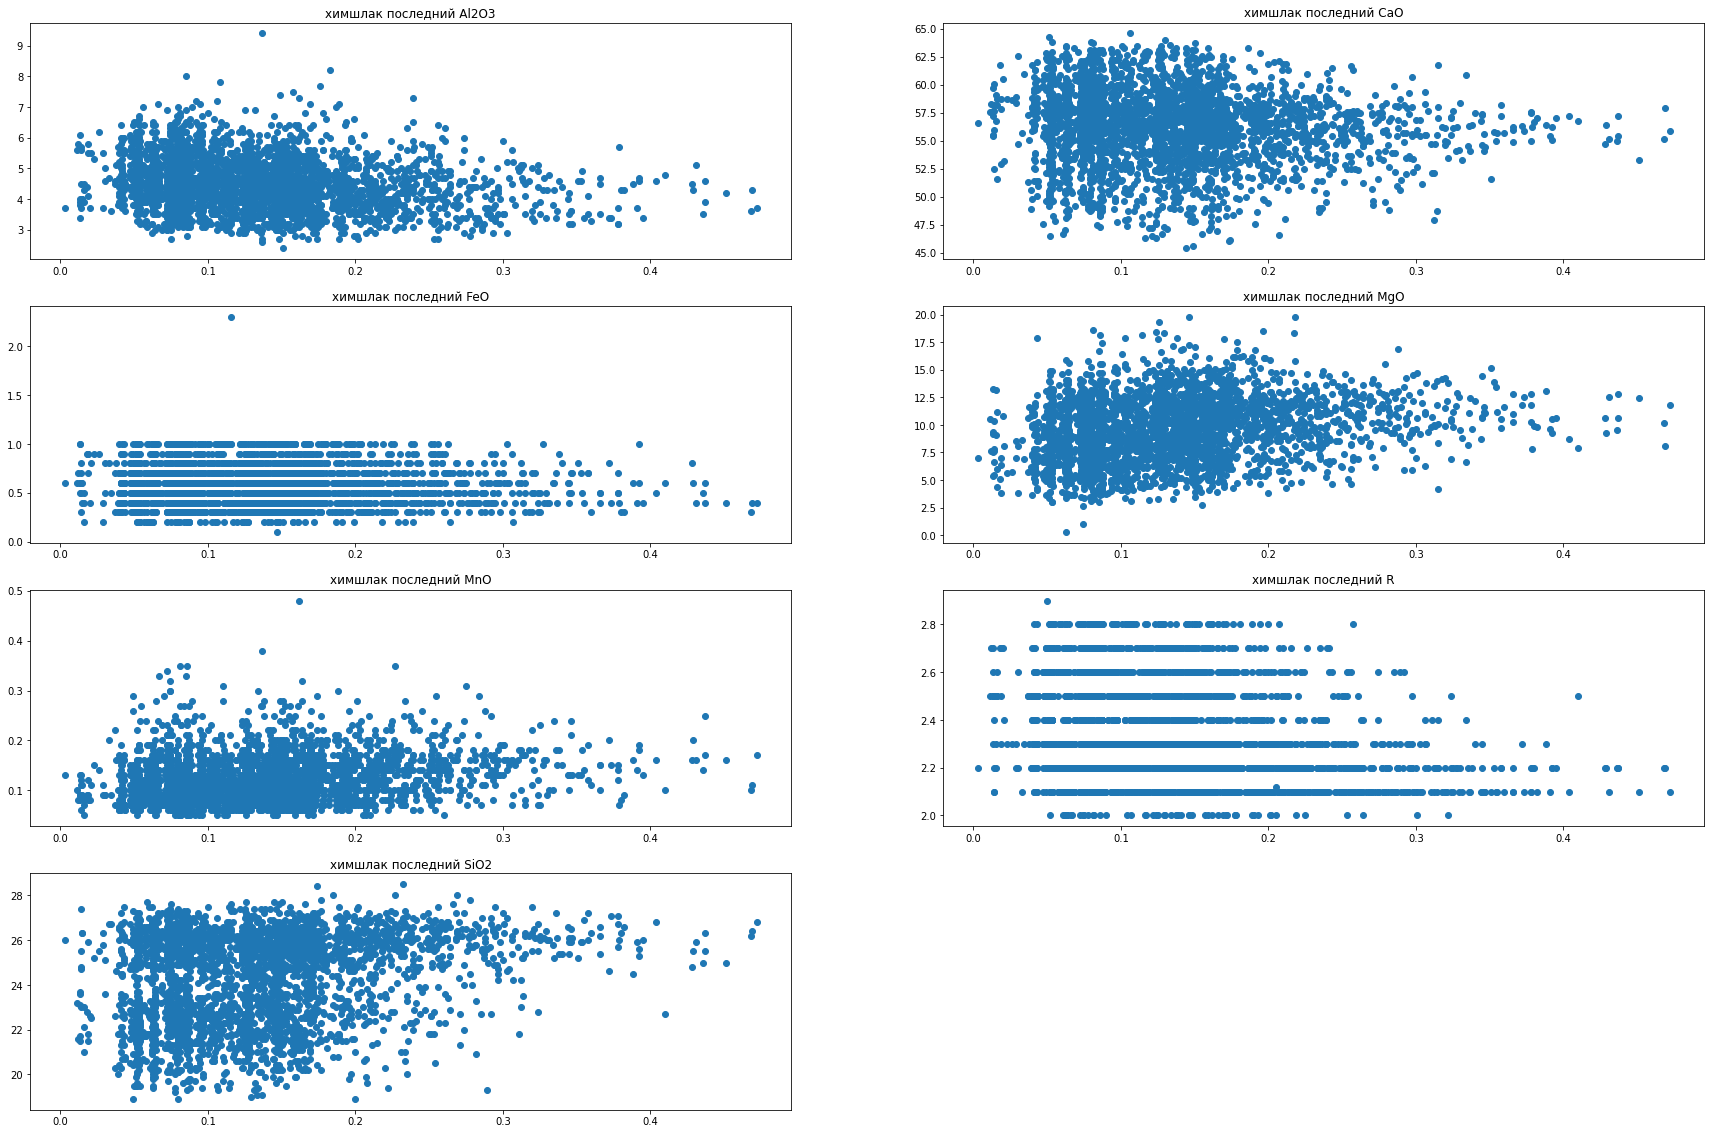

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(30, 20))
for i in range(7):
    axs[i//2, i%2].scatter(df[x1_col], df[x2_cols[i]])
    axs[i//2, i%2].set_title(x2_cols[i])
axs[-1,-1].axis('off')


In [26]:
df = pd.read_csv('evraz_data.csv', sep=';', decimal=",")
x1_col = 'сыпуч известь РП'
x2_col = 'химшлак последний FeO'
df = df[[x1_col, x2_col]]
print(df.shape)
df = df.dropna()
print(df.shape)

(7041, 2)
(4770, 2)


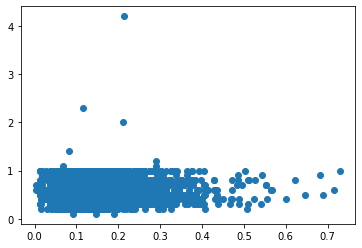

In [27]:
plt.scatter(df[x1_col], df[x2_col])

(3397, 2)


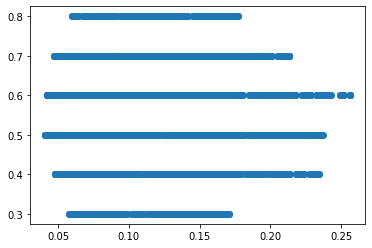

In [28]:
# Удаленние выбросов
isfor = IsolationForest()
isfor.fit(df)
isfor_pred = isfor.predict(df)

df = df[isfor_pred==1]
print(df.shape)
plt.scatter(df[x1_col], df[x2_col])

0.5 0.11273727810650888 0.04951149605291365
0.6 0.12365159587765959 0.05222618944158456
0.7 0.11333596837944664 0.044623283124207214
0.3 0.10639047619047619 0.03322242026660981
0.4 0.1176194563662375 0.047303397616503935
0.8 0.11475357142857143 0.03286117189059991


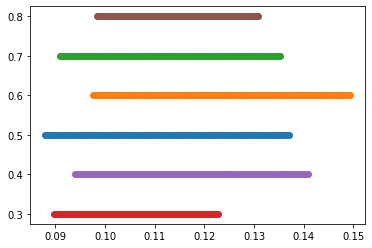

In [40]:
for val in df[x2_col].unique():
    subset = df[df[x2_col] == val][x1_col]
    mean, std = subset.mean(), subset.std()
    print(val, mean, std)
    steps = 100
    plt.scatter(
        [mean +(-steps//2 + i) * 1/steps * std for i in range(steps)],
        [val for _ in range(steps)])

(7041, 8)
(3763, 8)
(3316, 8)


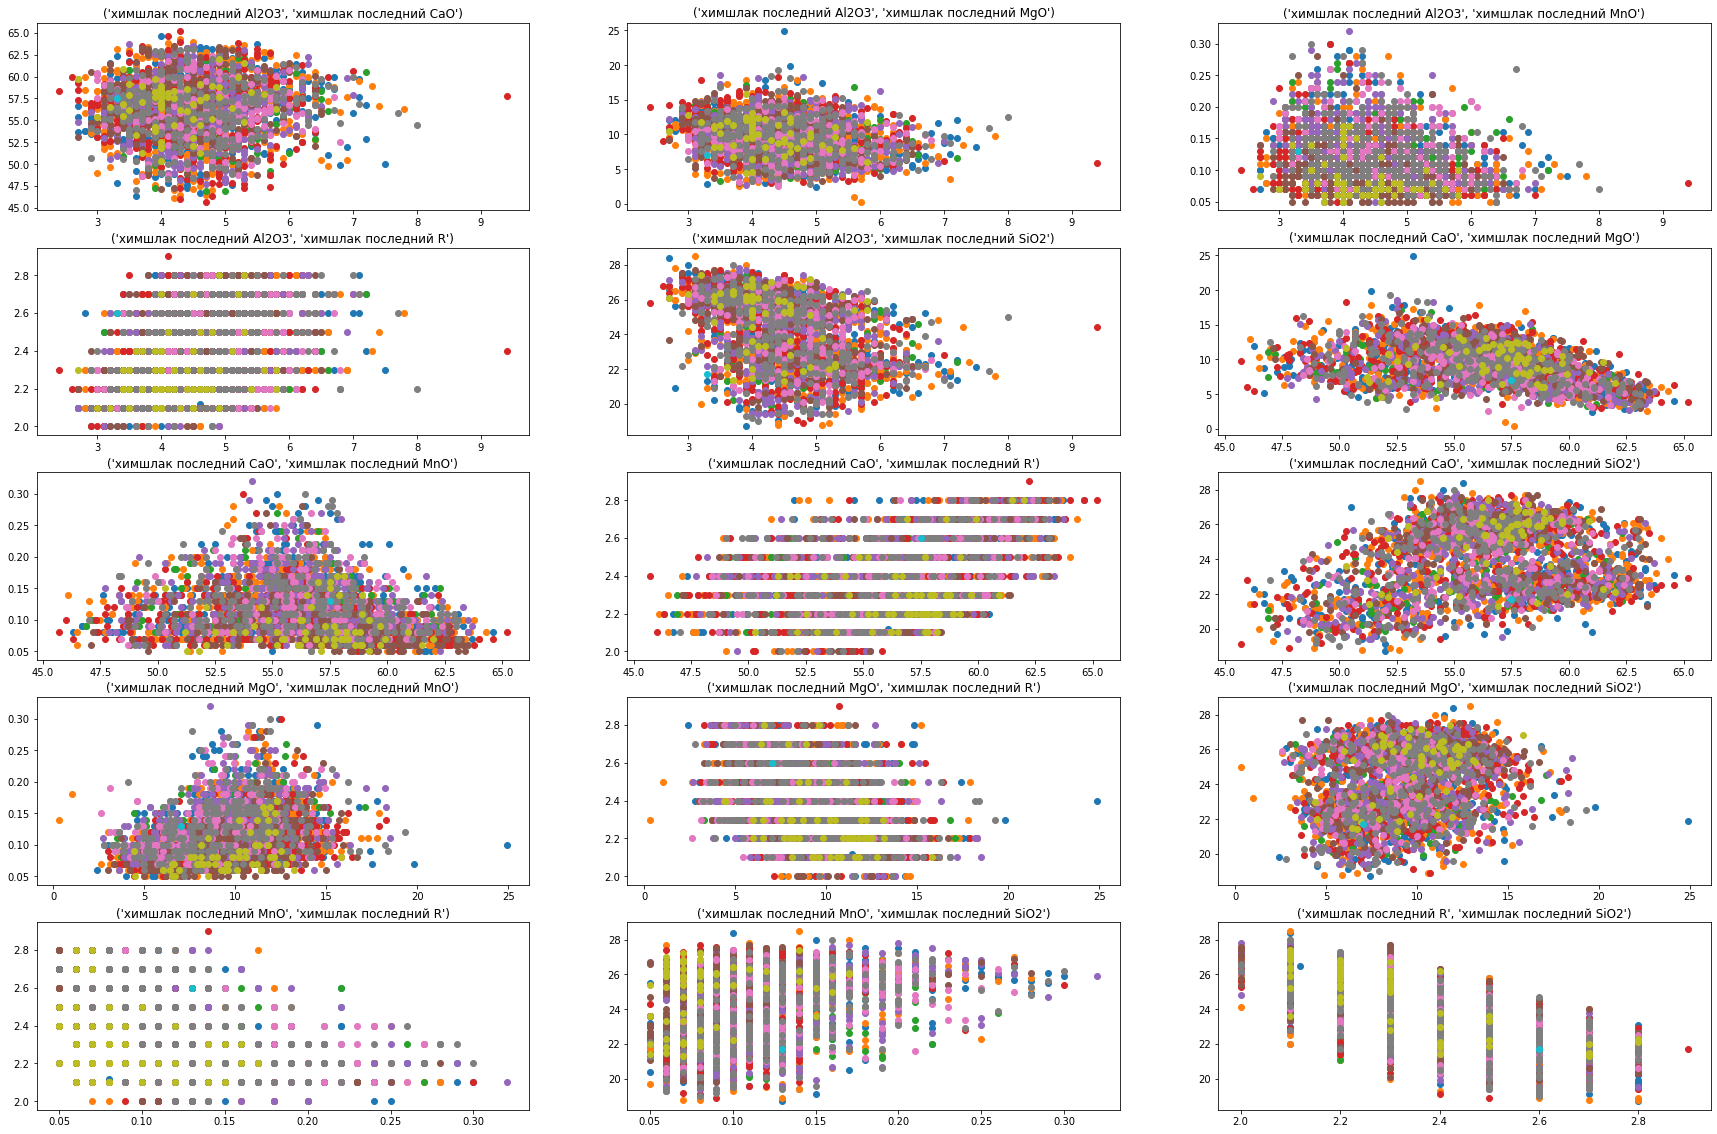

In [58]:
df = pd.read_csv('evraz_data.csv', sep=';', decimal=",")
x1_col = 'сыпуч известь РП'
x2_cols = ['химшлак последний Al2O3', 'химшлак последний CaO',
          'химшлак последний FeO', 'химшлак последний MgO',
          'химшлак последний MnO', 'химшлак последний R',
          'химшлак последний SiO2']
x2_col = 'химшлак последний FeO'
df = df[[x1_col] + x2_cols]
print(df.shape)
df = df.dropna()
print(df.shape)

# Удаленние выбросов
isfor = IsolationForest()
isfor.fit(df)
isfor_pred = isfor.predict(df)

df = df[isfor_pred==1]
print(df.shape)

fig, axs = plt.subplots(5, 3, figsize=(30, 20))
idx = -1
for i in range(7):
    for j in range(7):
        if i == 2 or j == 2 or j <= i:
            continue
        idx += 1
        pl = axs[idx//3, idx%3]
        for val in df[x2_col].unique():
            subset = df[df[x2_col] == val]
            pl.scatter(subset[x2_cols[i]], subset[x2_cols[j]])
        axs[idx//3, idx%3].set_title((x2_cols[i], x2_cols[j]))

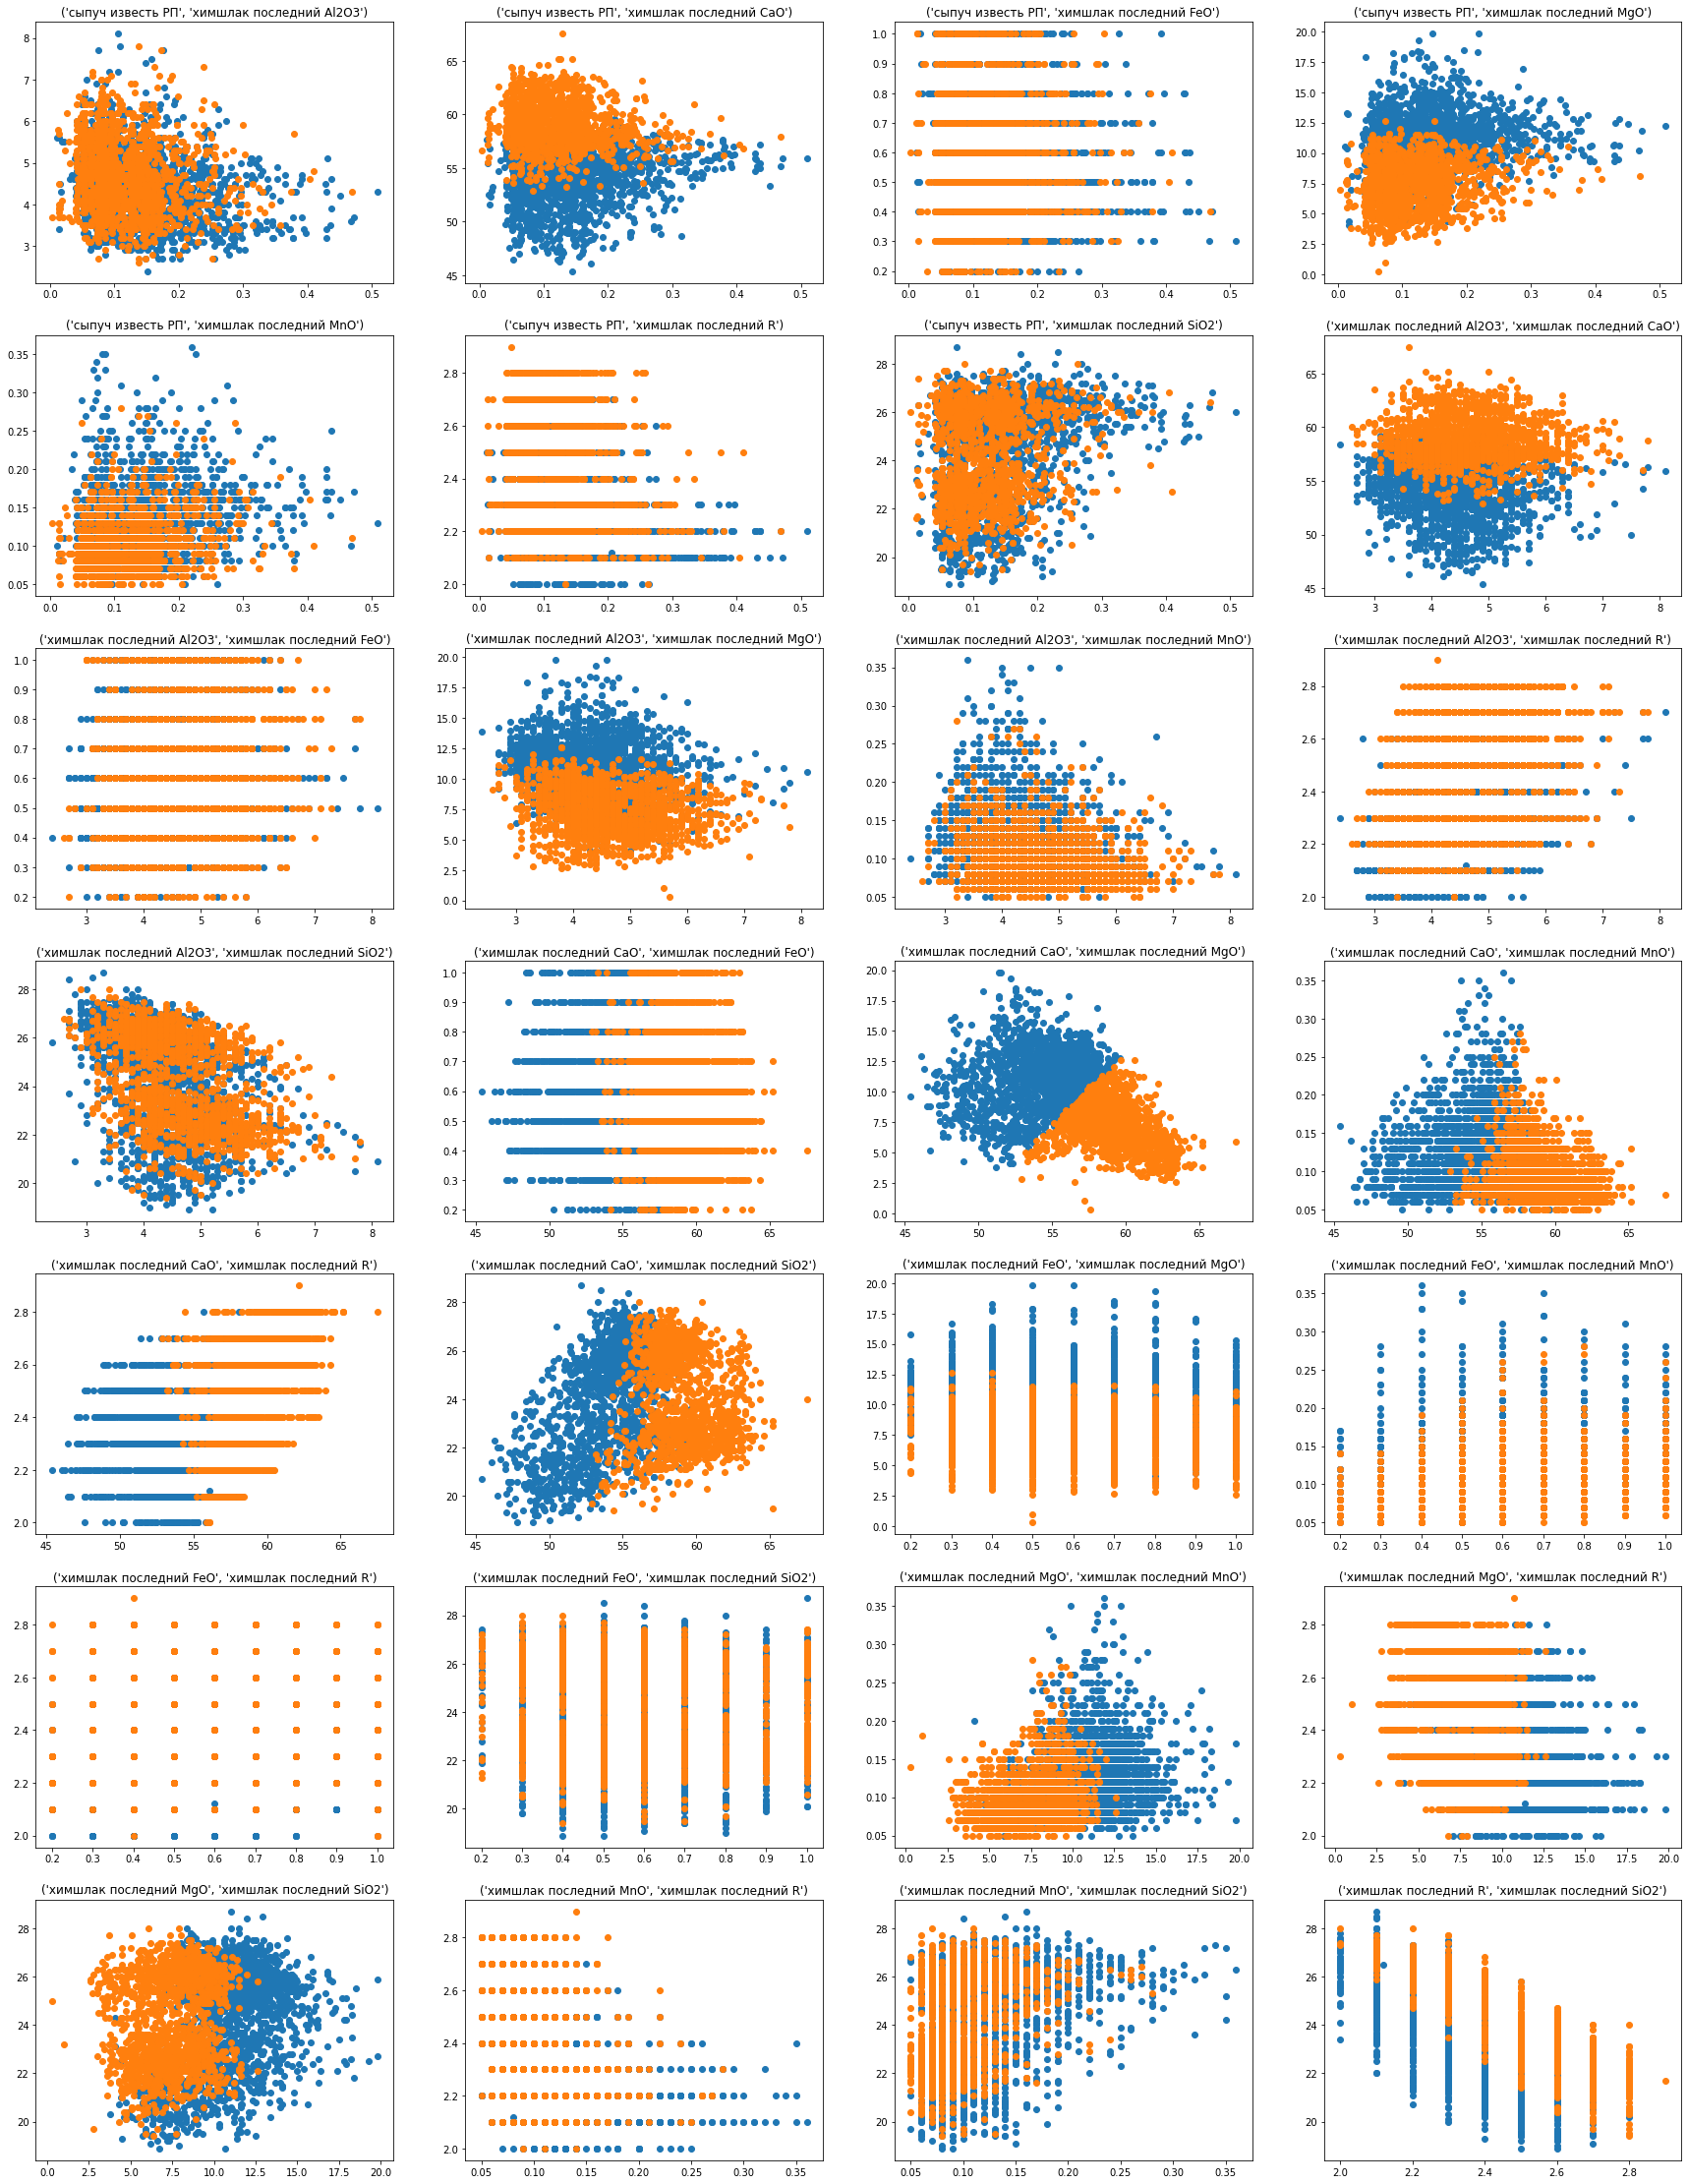

In [80]:
df = pd.read_csv('evraz_data.csv', sep=';', decimal=",")
x1_col = 'сыпуч известь РП'
x2_cols = ['химшлак последний Al2O3', 'химшлак последний CaO',
          'химшлак последний FeO', 'химшлак последний MgO',
          'химшлак последний MnO', 'химшлак последний R',
          'химшлак последний SiO2']
cols = [x1_col] + x2_cols
df = df[cols]
df = df.dropna()
isfor = IsolationForest()
isfor.fit(df)
isfor_pred = isfor.predict(df)
df = df[isfor_pred==1]

# for i in range(2, 10):
#     y_pred = KMeans(n_clusters=i).fit_predict(df)
#     print(i, silhouette_score(df, y_pred))

In [ ]:
y_pred = KMeans(n_clusters=2).fit_predict(df)
fig, axs = plt.subplots(7, 4, figsize=(30, 40))
idx = -1
for i in range(8):
    for j in range(8):
        if j <= i:
            continue
        idx += 1
        pl = axs[idx//4, idx%4]
        for k in range(2):
            subset = df[y_pred == k]
            pl.scatter(subset[cols[i]], subset[cols[j]])
        axs[idx//4, idx%4].set_title((cols[i], cols[j]))